# Divergence Analysis 

The model that has been used for the divergence analysis

![alt text](model8p.png "Title")

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt

In [2]:
# Import data from network
df_branches = pd.read_table('ampl_network_branches.txt', sep=" ", header=1).drop(columns=["#\"variant\""])
df_buses = pd.read_table('ampl_network_buses.txt', sep=" ", header=1).drop(columns=["#\"variant\""])
df_tct = pd.read_table('ampl_network_tct.txt', sep=" ", header=1).drop(columns=["#\"variant\""])

# Import values from divergence analysis optimization model
df_var_Vtheta = pd.read_csv("analysis_Vtheta.csv", sep=";")
df_penal_s = pd.read_csv("analysis_s.csv", sep=";")
df_penal_sigma = pd.read_csv("analysis_sigma.csv", sep=";")

### Calculation of sets and params for the rest of the analysis

In [ ]:
# Get dephasage values
df_branch_deph = df_branches[df_branches['phase tc'] != -1 and 
                            sqrt(df_branches['r (pu)']**2 + df_branches['x (pu)']**2) > 0.01]
df_branch_regl = df_branches[df_branches['ratio tc'] != -1 and 
                            sqrt(df_branches['r (pu)']**2 + df_branches['x (pu)']**2) > 0.01]

### Get important penalization values

##### About V and theta values

0.226


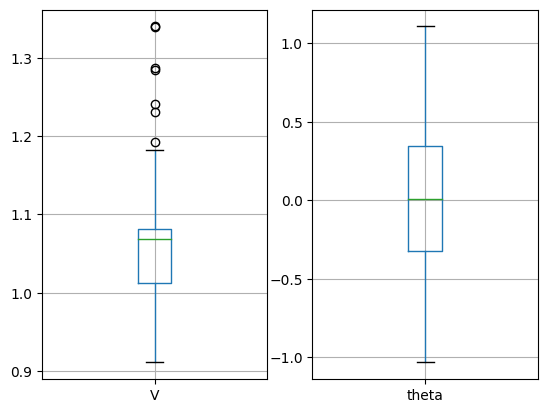

In [28]:
fig, axes = plt.subplots(1,2)
df_var_Vtheta.boxplot(column=['V'], ax=axes.flatten()[0])
df_var_Vtheta.boxplot(column=['theta'], ax=axes.flatten()[1])

##### About s penalization

<Axes: >

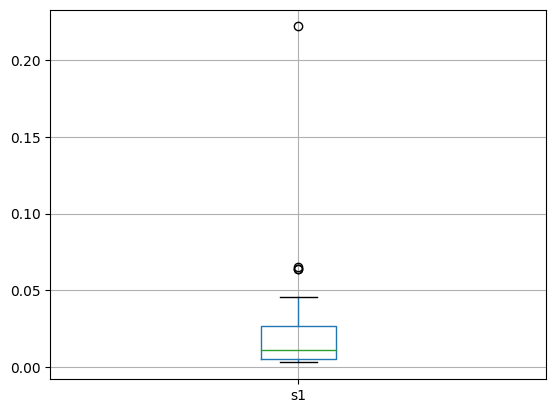

In [30]:
df_penal_s.abs().boxplot(column=['s1'])

About sigma penalization

In [ ]:
sigma_list = ['sigma1','sigma2','sigma3','sigma4','sigma5','sigma6','sigma7','sigma8']

sigma_quantiles = df_penal_sigma.loc[:,sigma_list].abs().quantile([0.02,0.5,0.98])
print(sigma_quantiles['sigma1'].values[-1])

sigma_main_values = []
for i in range(1,9):
    sigma_main_values.append(df_penal_sigma[df_penal_sigma['sigma'+str(i)] > sigma_quantiles['sigma'+str(i)].values[2]]['sigma'+str(i)])

### Print info about important penalization

In [23]:
print("### About rho penalization ###")
for index, element in sigma_main_values[0].iteritems():
    gap = 100 * element / df_branches['cst ratio (pu)'].get(index)
    print("Branch n°" + str(index) + " with id \"" + str(df_branches['id'].get(index)) 
        + "\", important value of rho penalization : " + str(element) + "   (gap of " + str(gap) + "%)")
print()


print("### About Y penalization ###")
for index, element in sigma_main_values[1].iteritems():
    admittance = 1 / sqrt( df_branches['r (pu)'].get(index)**2 + df_branches['x (pu)'].get(index)**2 )
    gap = 100 * element / admittance
    print("Branch n°" + str(index) + " with id \"" + str(df_branches['id'].get(index)) 
        + "\", important value of Y penalization : " + str(element) + "   (gap of " + str(gap) + "%)")
print()

# TODO
#print("### About dephor penalization ###")
#for index, element in sigma3_incoherences.iteritems():
#
#print()

# TODO
#print("### About Xi penalization ###")
#for index, element in sigma1_incoherences.iteritems():
#    print("Branch n°" + str(index) + " with id \"" + str(df_branches['id'].get(index)) 
#        + "\", important value of rho penalization : " + str(element) + "   (gap of " + str(element / df_branches['cst ratio (pu)'].get(index)) + "%)")

print("### About G_or penalization ###")
for index, element in sigma_main_values[4].iteritems():
    gap = 100 * element / df_branches['g1 (pu)'].get(index)
    print("Branch n°" + str(index) + " with id \"" + str(df_branches['id'].get(index)) 
        + "\", important value of G_or penalization : " + str(element) + "   (gap of " + str(gap) + "%)")
print()

print("### About G_ex penalization ###")
for index, element in sigma_main_values[5].iteritems():
    gap = 100 * element / df_branches['g2 (pu)'].get(index)
    print("Branch n°" + str(index) + " with id \"" + str(df_branches['id'].get(index)) 
        + "\", important value of G_ex penalization : " + str(element) + "   (gap of " + str(gap) + "%)")
print()

print("### About B_or penalization ###")
for index, element in sigma_main_values[6].iteritems():
    gap = 100 * element / df_branches['b1 (pu)'].get(index)
    print("Branch n°" + str(index) + " with id \"" + str(df_branches['id'].get(index)) 
        + "\", important value of B_or penalization : " + str(element) + "   (gap of " + str(gap) + "%)")
print()

print("### About G_or penalization ###")
for index, element in sigma_main_values[7].iteritems():
    gap = 100 * element / df_branches['b2 (pu)'].get(index)
    print("Branch n°" + str(index) + " with id \"" + str(df_branches['id'].get(index)) 
        + "\", important value of B_ex penalization : " + str(element) + "   (gap of " + str(gap) + "%)")
print()

### About rho penalization ###
Branch n°150 with id "bdd85972-f62d-461f-a1c3-125dd6825c33", important value of rho penalization : 0.38   (gap of 38.0%)
Branch n°505 with id "b447bea8-7d50-489c-8f68-4ae233c6d00a", important value of rho penalization : 0.839   (gap of 80.2525228370558%)

### About Y penalization ###
Branch n°353 with id "417fd321-a49f-4450-a74f-c8b0e275e0c1", important value of Y penalization : 0.761   (gap of 0.01912803448276266%)
Branch n°354 with id "ceae9251-11b0-4a32-89a1-c7cf0846b20f", important value of Y penalization : 0.765   (gap of 0.019228576056916472%)
Branch n°355 with id "4276aca2-be57-4e57-9693-88205f615307", important value of Y penalization : 0.756   (gap of 0.019002357515070394%)
Branch n°370 with id "1d9353be-aa38-432c-a361-ed728fb3657f", important value of Y penalization : 0.185   (gap of 0.018751011311861614%)
Branch n°504 with id "24be988f-373b-411f-ad55-6bf532e02770", important value of Y penalization : 0.168   (gap of 7.0777893429515855%)
Branch 

C:\Users\parvy\AppData\Local\Temp\ipykernel_4512\76077341.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, element in sigma_main_values[0].iteritems():
C:\Users\parvy\AppData\Local\Temp\ipykernel_4512\76077341.py:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, element in sigma_main_values[1].iteritems():
C:\Users\parvy\AppData\Local\Temp\ipykernel_4512\76077341.py:30: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, element in sigma_main_values[4].iteritems():
C:\Users\parvy\AppData\Local\Temp\ipykernel_4512\76077341.py:37: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, element in sigma_main_values[5].iteritems():
C:\Users\parvy\AppData\Local\Temp\ipykernel_4512\76077341.py:44: FutureWarning: iteritems is deprecated and w